<a href="https://colab.research.google.com/github/salmanromeo/MAE_5943_Unsteady_Aerodynamics_and_Aeroacoustics_Spring-2023/blob/main/Stokes%E2%80%99_first_problem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Stokes’ first problem**

iter     error            convergence of f(n→∞)
-----------------------------------------------
   1     7.358788e-01     0.000000e+00
   2     0.000000e+00     0.000000e+00

Solution converged!
The maximum change between consecutive profiles is less than the error criteria eProfile 1e-06

Solution for the boundary condition converged!
The difference between h(N) and h(N+1) is less than the error criteria eBC= 1e-06


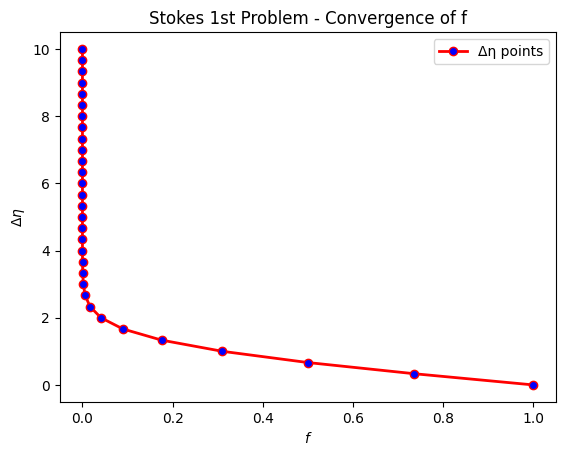

iter     error            convergence of f(n→∞)
-----------------------------------------------
   1     8.672499e-01     5.220246e-07
   2     0.000000e+00     5.220246e-07

Solution converged!
The maximum change between consecutive profiles is less than the error criteria eProfile 1e-06

Solution for the boundary condition converged!
The difference between h(N) and h(N+1) is less than the error criteria eBC= 1e-06
iter     error            convergence of f(n→∞)
-----------------------------------------------
   1     7.358788e-01     0.000000e+00
   2     0.000000e+00     0.000000e+00

Solution converged!
The maximum change between consecutive profiles is less than the error criteria eProfile 1e-06

Solution for the boundary condition converged!
The difference between h(N) and h(N+1) is less than the error criteria eBC= 1e-06
iter     error            convergence of f(n→∞)
-----------------------------------------------
   1     4.826201e-01     6.135310e-12
   2     0.000000e+00    

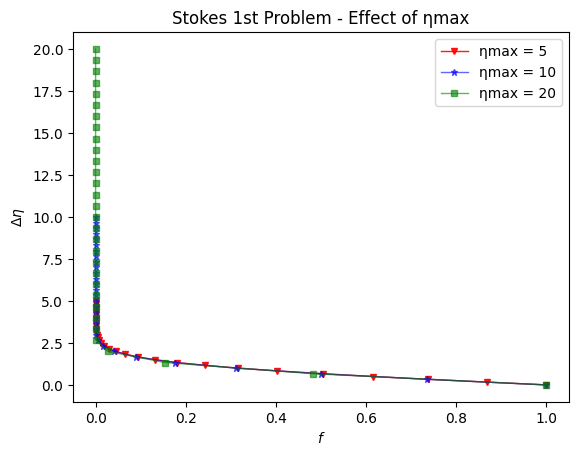

iter     error            convergence of f(n→∞)
-----------------------------------------------
   1     2.500000e-01     0.000000e+00
   2     0.000000e+00     0.000000e+00

Solution converged!
The maximum change between consecutive profiles is less than the error criteria eProfile 1e-06

Solution for the boundary condition converged!
The difference between h(N) and h(N+1) is less than the error criteria eBC= 1e-06
iter     error            convergence of f(n→∞)
-----------------------------------------------
   1     6.072388e-01     0.000000e+00
   2     0.000000e+00     0.000000e+00

Solution converged!
The maximum change between consecutive profiles is less than the error criteria eProfile 1e-06

Solution for the boundary condition converged!
The difference between h(N) and h(N+1) is less than the error criteria eBC= 1e-06
iter     error            convergence of f(n→∞)
-----------------------------------------------
   1     8.013065e-01     0.000000e+00
   2     0.000000e+00    

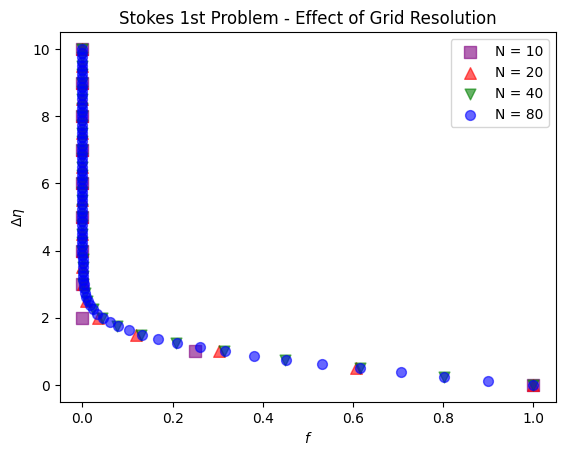

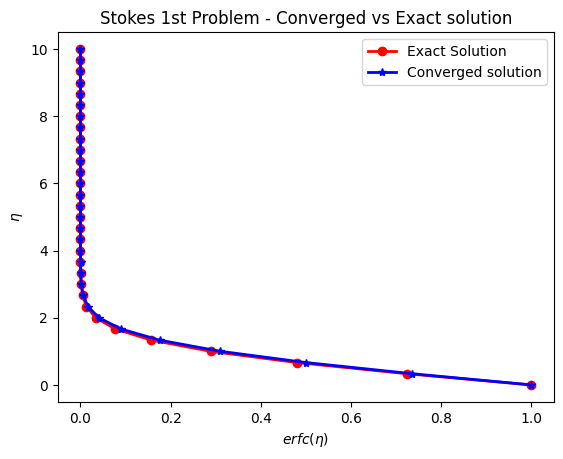

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import special

def stokes1st(nmax=10, N=30, itermax=40, eProfile=1e-6, eBC=1e-6):
    
    dn = nmax / N
    dnn = dn ** 2
    
    iter = 0
    errorProfile = 1.0
    errorBC = 1.0

    # Initialization of the arrays
    A = np.zeros(N+1)
    B = np.zeros(N+1)
    C = np.zeros(N+1)
    D = np.zeros(N+1)

    G = np.zeros(N+1)
    F = np.zeros(N+1)
    
    f = np.zeros(N+1)
    n = np.zeros(N+1)

    n = np.array([(i-1)*dn for i in range(1, N+2)])

    # BCs
    f[0] = 1.0   # f(n=0) = 1
    f[N] = 0.0   # f(n=∞) = 0

    G[0] = 1.0
    F[0] = 0.0

    # Solution initialization       
    print("iter     error            convergence of f(n→∞)")
    print("-----------------------------------------------")

    while eProfile<=errorProfile and iter<itermax:
        
        # Stokes 1st Problem
        A = [1/dnn + n[i]/(2*dn) for i in range(0, N+1)]
        B = [-2/dnn for i in range(0, N+1)]
        C = [1/dnn - n[i]/(2*dn) for i in range(0, N+1)]
        D = [0 for i in range(0, N+1)]

        for i in range(1, N):
            G[i] = - ( C[i] * G[i-1] + D[i] ) / (B[i] + C[i] * F[i-1])
            F[i] = -                 A[i]  /(B[i] + C[i] * F[i-1])

        hold = f.copy()

        for i in range(N-1, 0, -1):
            f[i] = G[i] + F[i] * f[i+1]

        errorProfile = np.max(np.abs(hold - f))
        errorBC = np.abs(f[N] - f[N-1])

        iter += 1
        print("{0:4d} {1:16.6e} {2:16.6e}".format(iter, errorProfile, errorBC))
    
    if errorProfile <= eProfile:
        print("")
        print("Solution converged!")
        print("The maximum change between consecutive profiles is less than the error criteria eProfile",eProfile)

    if errorBC <= eBC:
        print("")
        print("Solution for the boundary condition converged!")
        print("The difference between h(N) and h(N+1) is less than the error criteria eBC=",eBC)
        
        return n, f

ntest, ftest = stokes1st(10, 30)

plt.plot(ftest, ntest, label="Δη points", linewidth=2, color='red', marker='o', markerfacecolor='blue')
plt.title("Stokes 1st Problem - Convergence of f")
plt.xlabel("$f$")
plt.ylabel("$Δη$")
plt.legend(loc='upper right')

plt.show()

ns = []
fs = []
for n_max in [5, 10, 20]:
    n, f = stokes1st(n_max)
    ns.append(n)
    fs.append(f)

plt.figure()
plt.plot(fs[0], ns[0], label="ηmax = 5", linewidth=1, color='red', marker='v', markersize=5, alpha=0.9, markerfacecolor='red')
plt.plot(fs[1], ns[1], label="ηmax = 10", linewidth=1, color='blue', marker='*', markersize=5, alpha=0.6, markerfacecolor='blue')
plt.plot(fs[2], ns[2], label="ηmax = 20", linewidth=1, color='green', marker='s', markersize=5, alpha=0.6, markerfacecolor='green')
plt.title("Stokes 1st Problem - Effect of ηmax")
plt.xlabel("$f$")
plt.ylabel("$Δη$")
plt.legend(loc='upper right')

plt.show()

ns = []
fs = []
for N in [10, 20, 40, 80]:
    n, f = stokes1st(10, N)
    ns.append(n)
    fs.append(f)

plt.figure()
plt.scatter(fs[0], ns[0], label="N = 10", marker='s', s=80, alpha=0.6, color='purple')
plt.scatter(fs[1], ns[1], label="N = 20", marker='^', s=70, alpha=0.6, color='red')
plt.scatter(fs[2], ns[2], label="N = 40", marker='v', s=60, alpha=0.6, color='green')
plt.scatter(fs[3], ns[3], label="N = 80", marker='o', s=50, alpha=0.6, color='blue')
plt.title("Stokes 1st Problem - Effect of Grid Resolution")
plt.xlabel("$f$")
plt.ylabel("$Δη$")
plt.legend(loc='upper right')

plt.show()

plt.plot(special.erfc(3*ntest/4), ntest, label="Exact Solution", linewidth=2, color='red', marker='o', markerfacecolor='red')
plt.plot(ftest, ntest, label="Converged solution", linewidth=2, color='blue', marker='*', markerfacecolor='blue')
plt.title("Stokes 1st Problem - Converged vs Exact solution")
plt.xlabel('$erfc(η)$')
plt.ylabel('$η$')
plt.legend(loc='upper right')

plt.show()